# DATA 410 - Lecture 1


<font face="Chalkboard" color="darkgreen" size=10> Preliminaries and Coding</font>

## Research in Data Science

<figure>
<center>
<img src='https://drive.google.com/uc?id=15TsarM26JuceHzAlpVJYdRMbzIyY2t7N' 
width='500px' />
<figcaption>Research Flowchart</figcaption></center>
</figure>

## Where can we find cleaner data ?

https://archive.ics.uci.edu/ml/datasets/Forest+Fires

In [1]:
# Libraries of functions need to be imported
# Then we can import the data that was saved in the same folder
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
cars = pd.read_csv("drive/My Drive/Colab Notebooks/mtcars.csv")

In [2]:
cars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
cars.sort_values(by='wt')

In [ ]:
cars = cars.sort_values(by='wt')

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 150

### This is he actual scatter plot connnecting weight and mileage

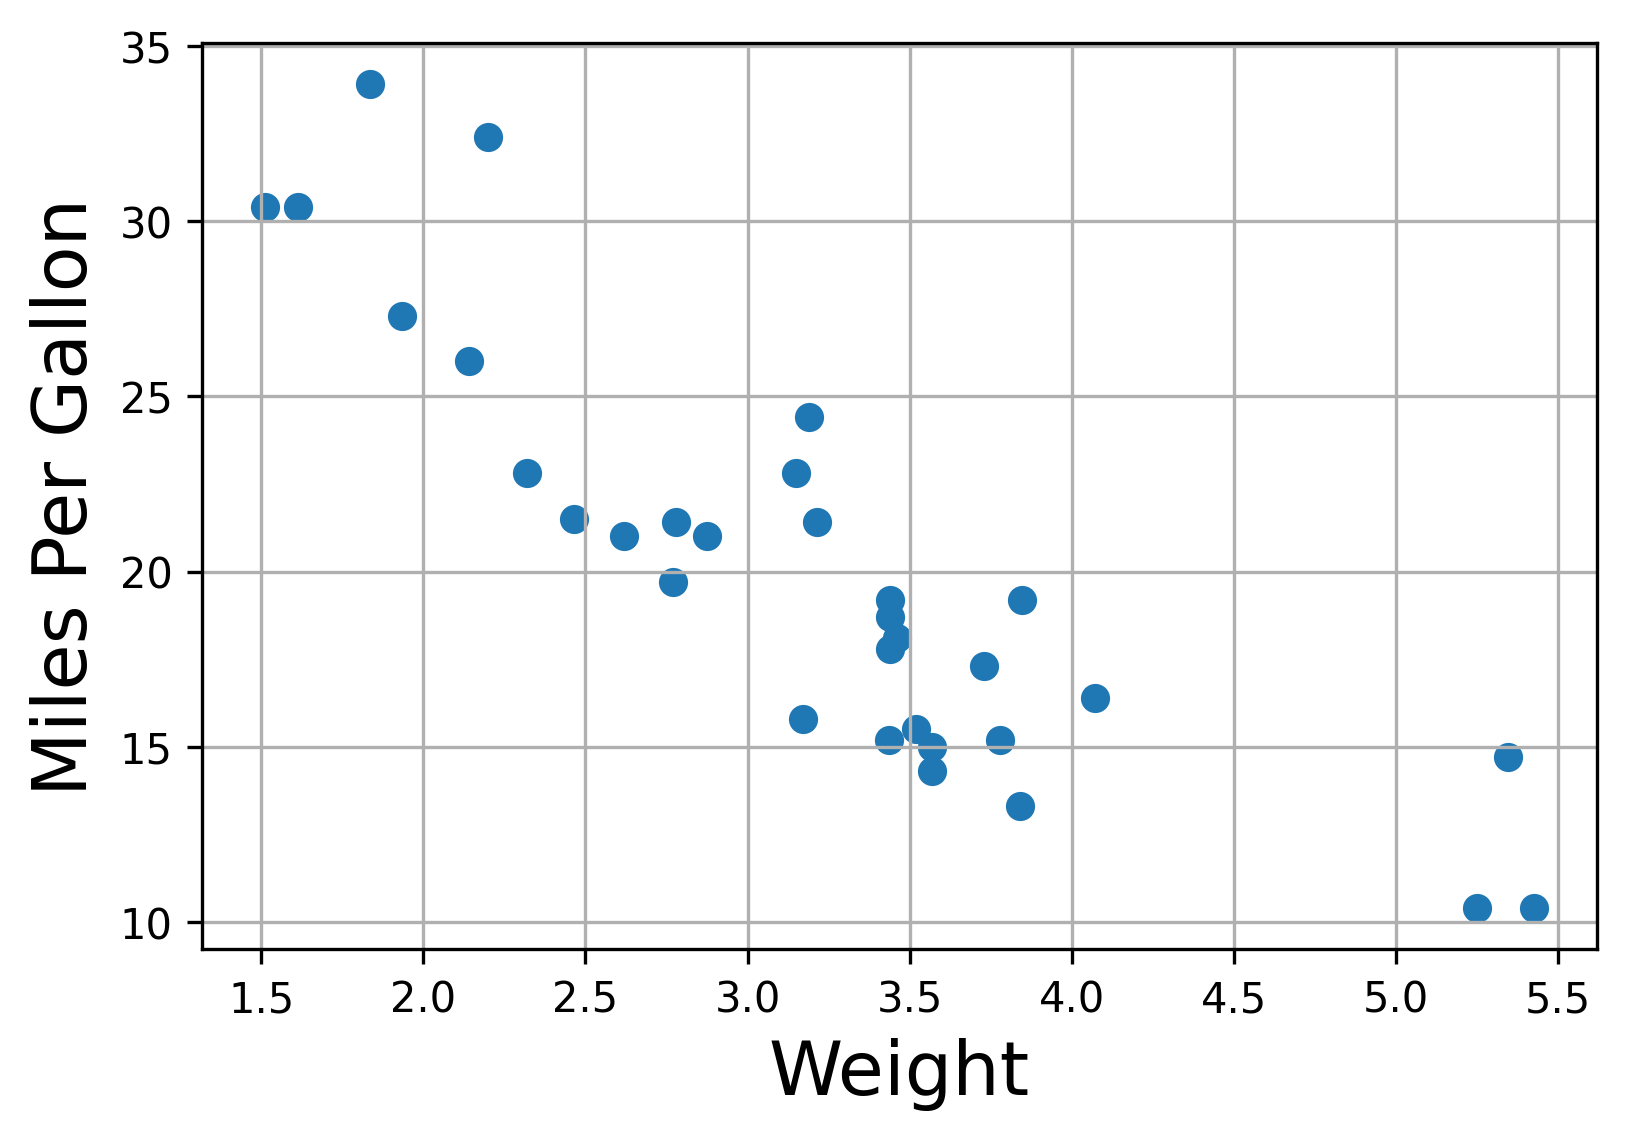

In [4]:
fig, ax = plt.subplots(1,1)
ax.scatter(cars["wt"],cars["mpg"])
plt.xlabel('Weight',fontsize=18)
plt.ylabel('Miles Per Gallon',fontsize=18)
ax.grid()
plt.savefig("mtcars.png")
x_range = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)

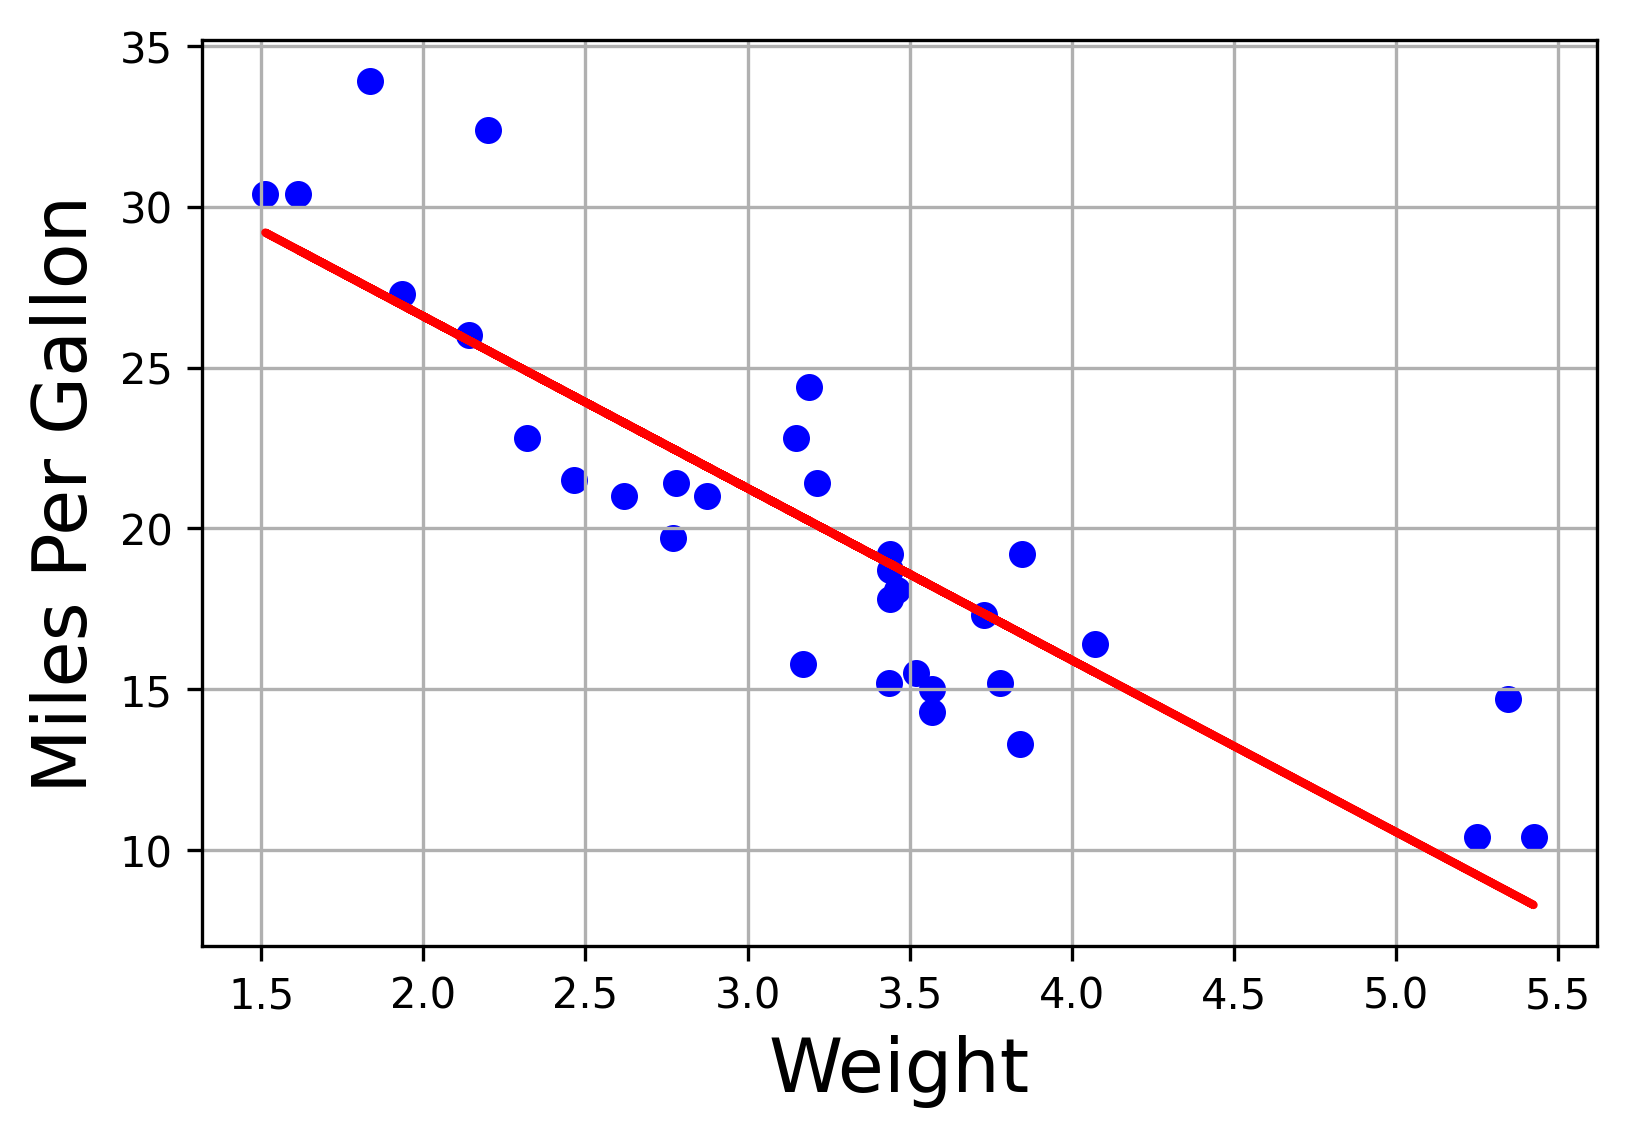

In [5]:
from sklearn import linear_model
x = cars["wt"].values
y = cars["mpg"].values
lm = linear_model.LinearRegression()
model = lm.fit(x.reshape(-1,1),y)
yhat = lm.predict(x.reshape(-1,1))
plt.scatter(cars["wt"],cars["mpg"],color='blue',s=30)
plt.plot(x, yhat, '-',color='red',lw=2)
plt.xlabel('Weight',fontsize=18)
plt.ylabel('Miles Per Gallon',fontsize=18)
plt.grid()
plt.savefig("mtcars_line.png")

In [7]:
lm.coef_

array([-5.34447157])

Interpretation: we expect to see on average an 5.34mpg drop if the weight of the car increases by 1 ton.

In [ ]:
import statsmodels.api as sm
lowess_sm = sm.nonparametric.lowess
y_sm = lowess_sm(y,x,frac=1./3.,it=5, return_sorted = False)

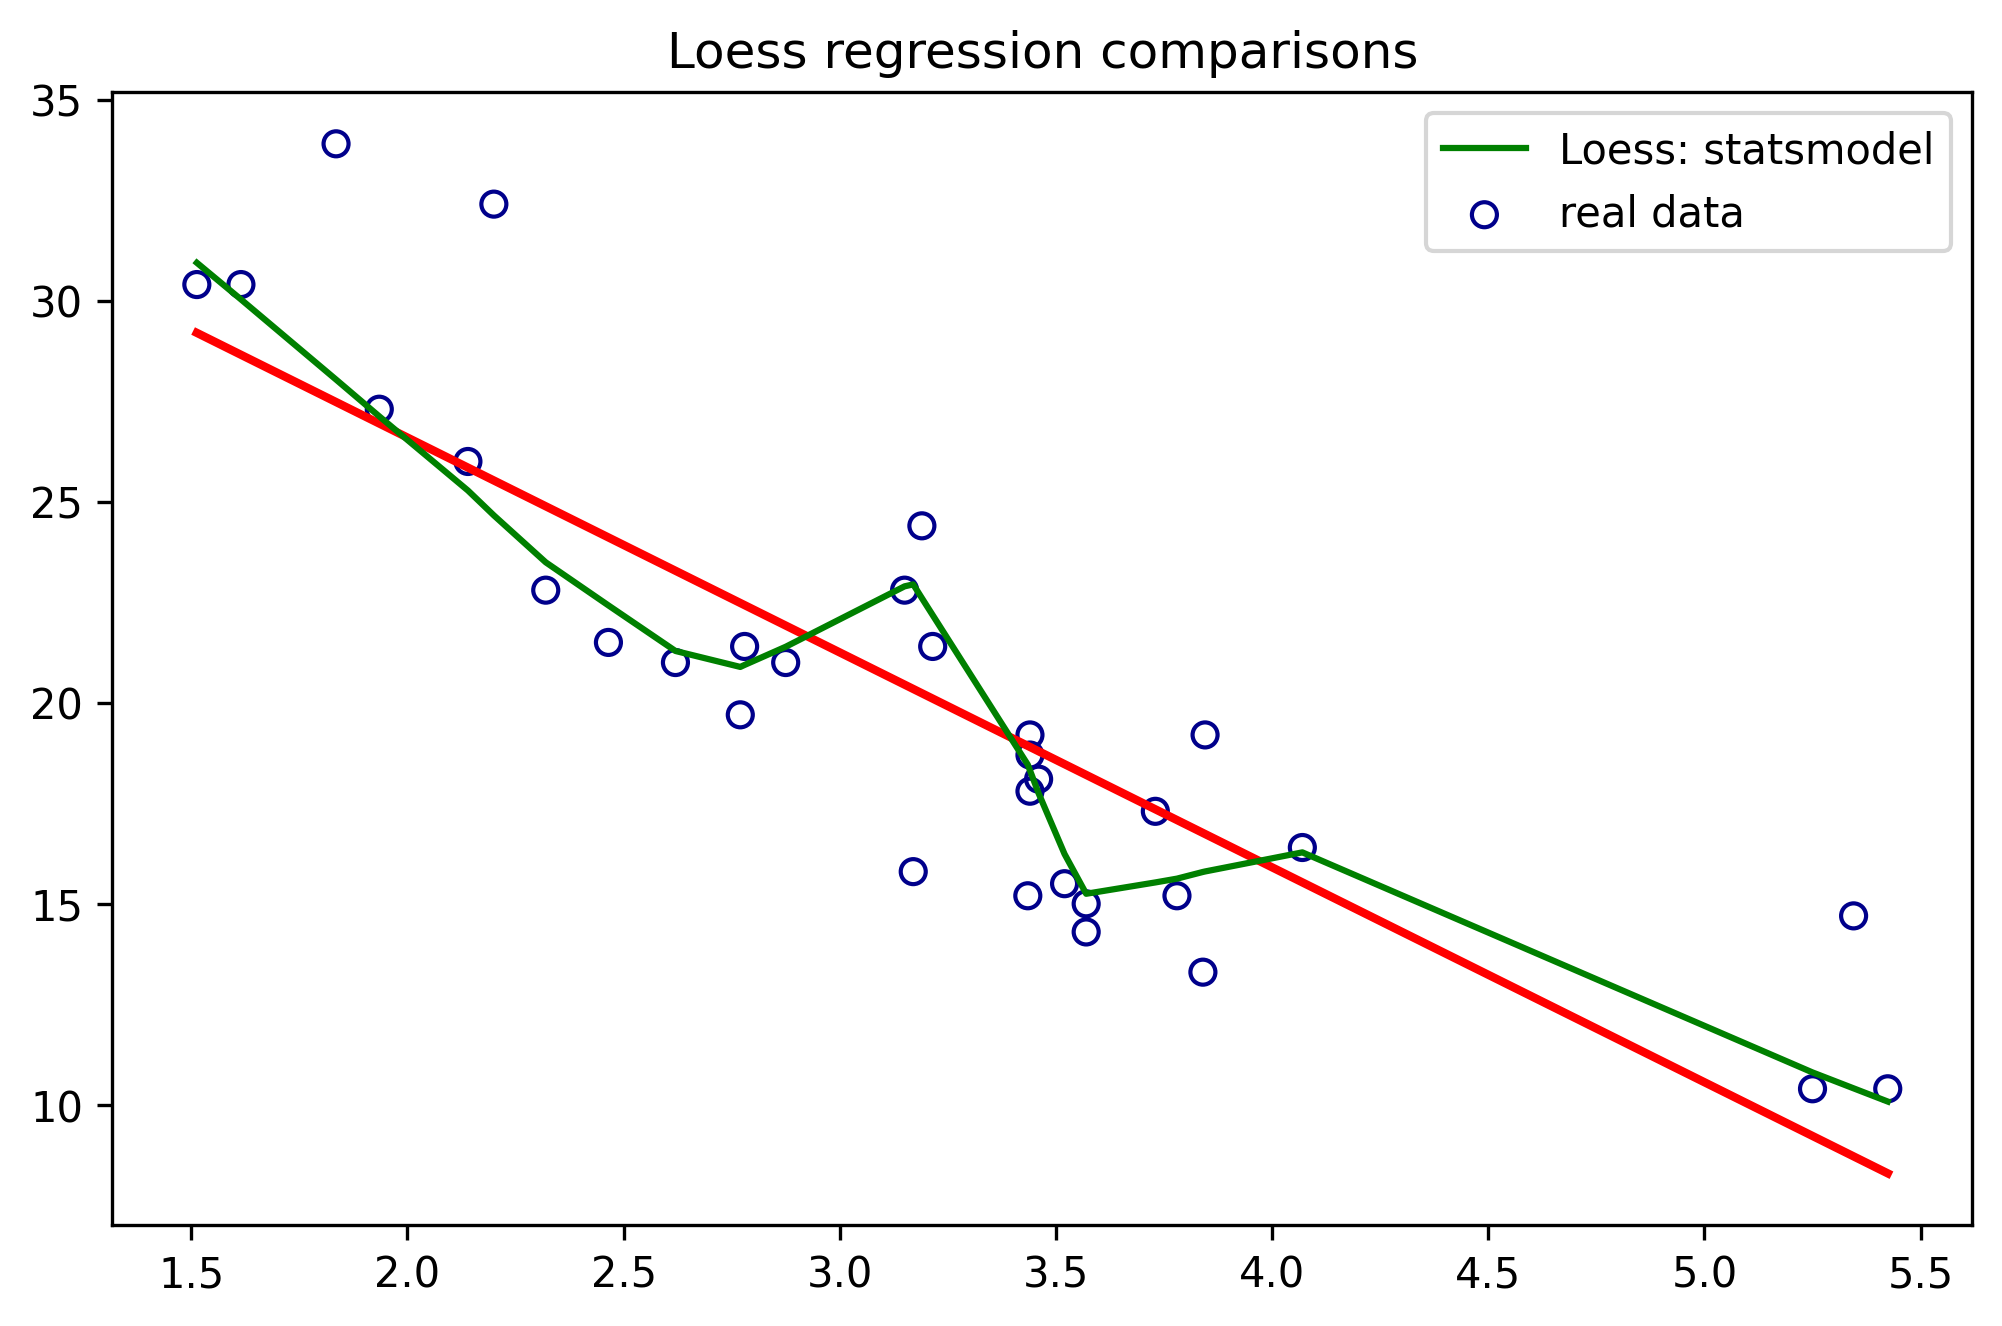

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x,y, facecolors = 'none', edgecolor = 'darkblue', label = 'real data')
plt.plot(x, yhat, '-',color='red',lw=2)
plt.plot(x,y_sm,color = 'green', label = 'Loess: statsmodel')
plt.legend()
plt.title('Loess regression comparisons')
plt.show()

### Locally Weighted Linear Regression (Loess)
https://xavierbourretsicotte.github.io/loess.html